In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# import plotly libraries
import plotly.express as px
import plotly.graph_objects as go

In [2]:
train_pd = pd.read_csv('train.csv')
test_pd = pd.read_csv('test.csv')

#display(train_pd.head())
#display(test_pd.head())
train_pd.head()
test_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# removing the survived column from the training data and storing it in a separate variable
survived = train_pd['Survived']
train_pd = train_pd.drop('Survived', axis=1)


In [6]:
#checking the shape of the dataframes
print(train_pd.shape)
print(test_pd.shape)

(891, 11)
(418, 11)


In [7]:
# storing the passenger id in a separate variable for later use
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

In [8]:
#display(combined_pd)
combined_pd = combined_pd.drop('PassengerId', axis=1)
combined_pd.head(25)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print("Null Values in each column:")
print(combined_pd.isnull().sum())

Null Values in each column:
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [10]:
# get values counts of each age.
y = combined_pd['Age'].value_counts()  
y

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64

In [11]:
# get the index values (ages).
x = y.index.values
x

array([24.  , 22.  , 21.  , 30.  , 18.  , 25.  , 28.  , 36.  , 27.  ,
       26.  , 29.  , 19.  , 23.  , 32.  , 31.  , 35.  , 20.  , 45.  ,
       33.  , 39.  , 17.  , 16.  , 40.  , 42.  , 34.  , 50.  , 47.  ,
       48.  , 38.  ,  2.  , 41.  , 54.  ,  4.  ,  1.  ,  9.  , 44.  ,
       43.  , 37.  , 49.  , 51.  , 55.  , 14.  , 60.  ,  3.  , 58.  ,
       46.  , 52.  ,  6.  , 15.  ,  8.  , 57.  , 64.  , 13.  , 61.  ,
       62.  ,  5.  ,  7.  , 11.  , 32.5 , 63.  , 53.  , 56.  , 10.  ,
       59.  , 28.5 , 65.  , 18.5 , 12.  ,  0.83,  0.75, 40.5 , 30.5 ,
       45.5 , 71.  , 14.5 , 34.5 , 70.  , 36.5 ,  0.92, 66.  , 70.5 ,
       55.5 , 20.5 , 24.5 , 23.5 , 80.  ,  0.42,  0.67, 74.  , 22.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

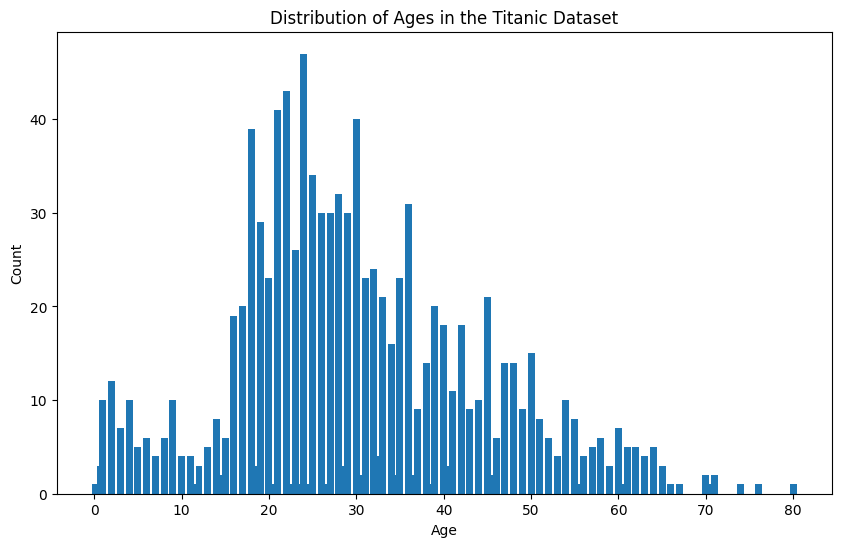

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Distribution of Ages in the Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
# create the above plot using plotly
fig = px.bar(x=x, y=y, labels={'x': 'Age', 'y': 'Count'}, title='Distribution of Ages in the Titanic Dataset')
fig.show()

In [14]:
class_age = combined_pd[['Pclass', 'Age']]
class_age.head(10)

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
5,3,NaN
6,1,54.0
7,3,2.0
8,3,27.0
9,2,14.0


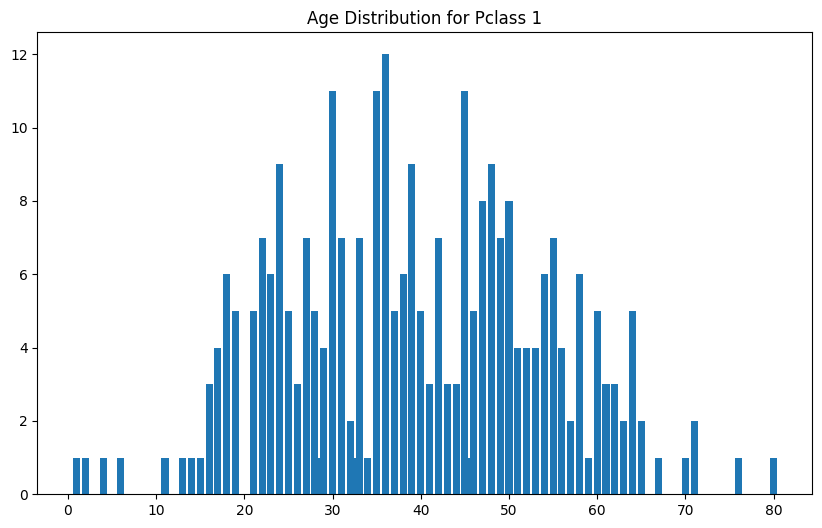

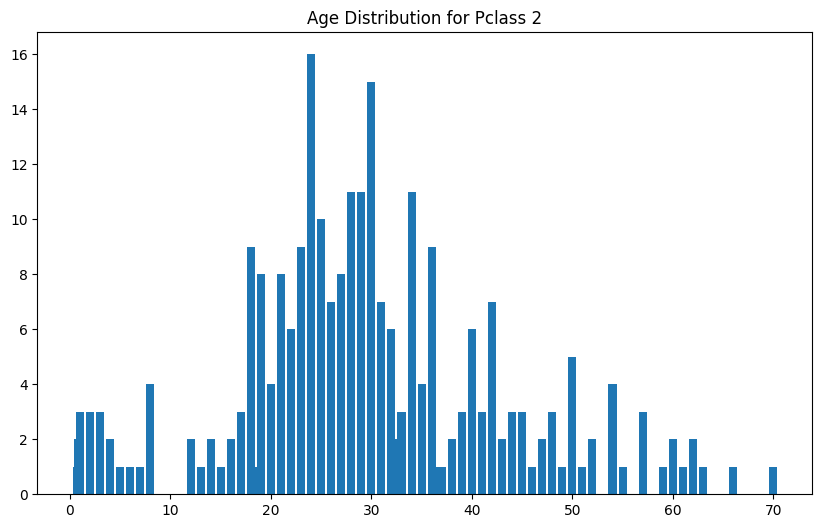

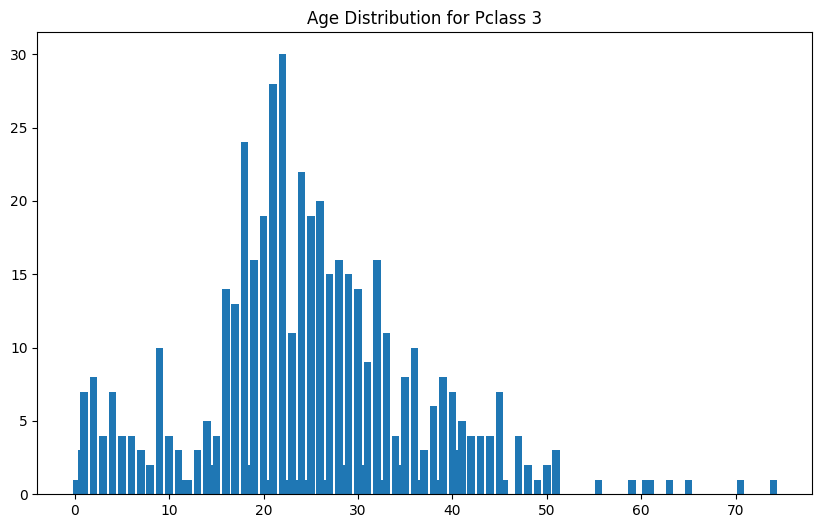

In [15]:
for i in range(1,4):
    plt.figure(figsize=(10, 6))
    plt.title(f'Age Distribution for Pclass {i}')
    y = class_age[class_age['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.show()

In [16]:
medians = class_age.groupby('Pclass').median()

In [17]:
medians

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [19]:
for i in range(3):
    idx = np.where( (combined_pd['Pclass'] == i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]
    

In [20]:
print(combined_pd.isnull().sum())

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [21]:
#display the row with null value in the Fare column.
display(combined_pd[combined_pd['Fare'].isnull()])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
#point to remember, if you embarked from the same location with same
#class you will have the same fare. So we can fill the null value with the median of the fare for that class and embarked location.
sim_fare = combined_pd[(combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S')]['Fare']
sim_fare.median()

np.float64(8.05)

In [25]:
#replace the null value with the median fare for that class and embarked location.
combined_pd.loc[combined_pd['Fare'].isnull(), 'Fare'] = sim_fare.median()

In [24]:
combined_pd[combined_pd['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
#again, if fare is same and class of ticket is same then embarked location will also be same. So we can fill the null value with the median of the embarked location for that class and fare.
sim_embarked = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] > 70) & (combined_pd['Fare'] <= 90)]['Embarked']

In [27]:
print(sim_embarked.value_counts())

Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [28]:
# highest occuring value is C so we can fill the null value with C.
combined_pd.loc[combined_pd['Embarked'].isnull(), 'Embarked'] = 'C'

In [29]:
# now we do something for the cabin column.
# we fill it with a value M for missing.
combined_pd['Cabin'] = combined_pd['Cabin'].fillna('M')
#now we take the first letter of the cabin and make it a new column.
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]
#we show the value counts of the cabin column.
print(combined_pd['Cabin'].value_counts())

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [30]:
# we add T to the Missing as we don't know what it means.
combined_pd.loc[combined_pd['Cabin'] == 'T', 'Cabin'] = 'M'
print(combined_pd['Cabin'].value_counts())

Cabin
M    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64


In [31]:
combined_pd.isnull().sum()  

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Data Feature Engineering

In [32]:
print(combined_pd.nunique())

Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin          8
Embarked       3
dtype: int64


In [33]:
#we start with the names column.
combined_pd['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'],
      shape=(1307,), dtype=object)

In [34]:
names = combined_pd['Name']
last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(',', 1)
        last_names.append(last.strip())
    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('.', 1)
        titles.append(title.strip())
        first_names.append(first.strip())
last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)


np.unique(titles, return_counts=True)
    

(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype='<U12'),
 array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
        197,   2,   8,   1,   1]))

In [36]:
#replacing the titles with more common ones. 
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

In [37]:
#replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'


In [39]:
# replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Ms', 'Mlle', 'Miss']))
titles[idx] = 'Ms'

In [40]:
# replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

In [41]:
np.unique(titles)

array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12')

In [44]:
combined_pd['Title'] = titles
titles

array(['Mr', 'Mrs', 'Ms', ..., 'Mr', 'Mr', 'Nobility'],
      shape=(1309,), dtype='<U12')

In [43]:
combined_pd.nunique()

Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin          8
Embarked       3
Title          7
dtype: int64

In [45]:
# titles = combined_pd['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# titles_list = titles.unique().tolist()
# titles_list

In [46]:
# title_mapping = {
#     'Capt': 'Military',
#     'Col': 'Military',
#     'Major': 'Military',

#     'Don': 'Nobility',
#     'Dona': 'Nobility',
#     'Jonkheer': 'Nobility',
#     'Lady': 'Nobility',
#     'Sir': 'Nobility',
#     'Master': 'Nobility',
#     'the Countess': 'Nobility',

#     'Miss': 'Ms',
#     'Mlle': 'Ms',
#     'Ms': 'Ms',

#     'Mrs': 'Mrs',
#     'Mme': 'Mrs'
# }

# combined_pd['title'] = (
#     combined_pd['Name']
#     .str.split(',').str[1]
#     .str.split('.').str[0]
#     .str.strip()
#     .map(lambda t: title_mapping.get(t, t))  # keep rest as-is
# )


In [47]:
#display(combined_pd)

In [48]:
combined_pd['Title'].isnull().sum()

np.int64(0)

In [49]:
#lets make bin for ages column.
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
combined_pd['age_bin'] = pd.cut(combined_pd['Age'], bins)


In [50]:
#we are going to check if there are any tickets with same ticket number.
#because if there are tickets with same number we might want to adjust the fare.
ticket_dict = dict(combined_pd['Ticket'].value_counts())

In [52]:
combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)   

In [53]:
combined_pd['Fare_per_ticket'] = combined_pd['Fare'] / combined_pd['tkt_count']

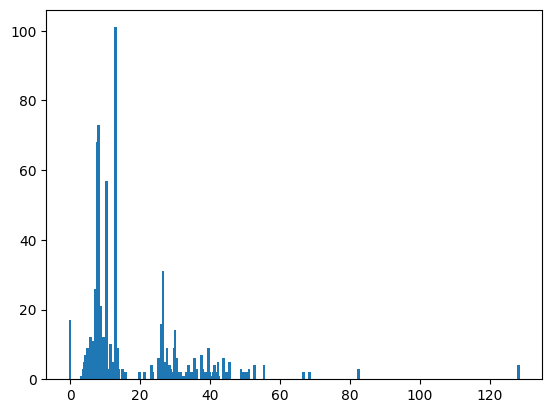

In [54]:
plt.bar(combined_pd['Fare_per_ticket'].value_counts().index.values, combined_pd['Fare_per_ticket'].value_counts())
plt.show()

In [55]:
bins = [0, 20, 40, 60, 80, 150]
combined_pd['Fare_bin'] = pd.cut(combined_pd['Fare_per_ticket'], bins)

In [56]:
combined_pd['num_family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1

In [57]:
combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_ticket'], axis=1, inplace=True)

In [58]:
combined_pd.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
0,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


# sklearn

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [62]:
combined_pd.set_index('PassengerId', inplace=True)

KeyError: "None of ['PassengerId'] are in the columns"

In [ ]:
label_enc = combined_pd.copy()

In [ ]:
label_enc = label_enc.astype(str)

In [ ]:
label_enc = label_enc.apply(LabelEncoder().fit_transform)

In [ ]:
label_enc.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0


In [ ]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title']).astype(int)


In [ ]:
one_hot.head()

,Pclass,SibSp,Parch,Cabin,age_bin,Fare_bin,num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Now combine the Survived column back to the one_hot dataframe.
X = one_hot.iloc[train_idx].values
y = survived.values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 19) (712,) (179, 19) (179,)


In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)


0.5363128491620112